# Introduction

In this notebook we try to let a MLP learn a non-linear test function, here: f(x)=x^2

There are two common pifalls:
- Pitfall #1: no data scaling --> MLP will have severe problems to find the right weights
- Pitfall #2: only using linear activation functions --> MLP then cannot learn such non-linear functions

This notebook is set up such that you can test both pitfalls with the following boolean switches:

In [1]:
# Set this to "True" if you want to test what happens with no data scaling
pitfall1 = False

# Set this to "True" if you want to test what happens with using only linear activation functions
pitfall2 = False

# Check dependencies

In [2]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [3]:
import matplotlib
print(matplotlib.__version__)

import matplotlib.pyplot as plt

3.1.3


In [4]:
import numpy as np
print(np.__version__)

1.18.1


In [5]:
import random

# Try to learn `f(x)=x^2`

## Prepare some example data

In [6]:
x = np.arange(-20.0, 20.0, 0.2)

if not pitfall1:
    # It really helps to map/scale your
    # inputs / outputs to [0,1]
    # --> training of the NN will be much faster
    max_value = max(x)
    x = x/max_value

y = x**2

In [7]:
type(x)

numpy.ndarray

In [8]:
x.shape

(200,)

In [9]:
type(y)

numpy.ndarray

In [10]:
y.shape

(200,)

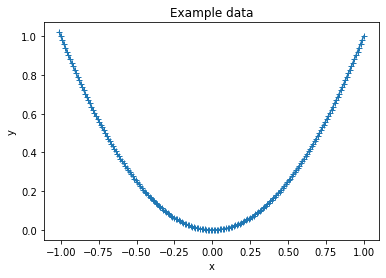

In [11]:
plt.plot(x,y,marker="+")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Example data")
plt.show()

## Shuffle the example data

In [12]:
combined = list(zip(x,y))

In [13]:
combined[:10]

[(-1.0101010101010175, 1.020304050607096),
 (-1.0000000000000073, 1.0000000000000147),
 (-0.9898989898989973, 0.9799000102030551),
 (-0.9797979797979871, 0.9600040812162167),
 (-0.9696969696969769, 0.9403122130394999),
 (-0.9595959595959668, 0.9208244056729042),
 (-0.9494949494949566, 0.9015406591164302),
 (-0.9393939393939466, 0.8824609733700778),
 (-0.9292929292929364, 0.8635853484338465),
 (-0.9191919191919262, 0.8449137843077367)]

In [14]:
random.shuffle(combined)

In [15]:
x,y = zip(*combined)
x = np.array(x)
y = np.array(y)

In [16]:
x[:10]

array([-0.56565657,  0.25252525, -0.74747475, -0.47474747,  0.48484848,
       -0.07070707, -0.78787879,  0.58585859,  0.23232323,  0.74747475])

In [17]:
y[:10]

array([0.31996735, 0.063769  , 0.5587185 , 0.22538516, 0.23507805,
       0.00499949, 0.62075298, 0.34323028, 0.05397408, 0.5587185 ])

## Split example data into training and test data

In [18]:
N = len(x)
N

200

In [19]:
x.shape

(200,)

In [20]:
x = x.reshape((N,1))
y = y.reshape((N,1))

In [21]:
x.shape

(200, 1)

In [22]:
y.shape

(200, 1)

In [23]:
M = N//2
M

100

In [24]:
x_train = x[:M]
y_train = y[:M]
x_test  = x[M:]
y_test  = y[M:]

In [25]:
x_train.shape

(100, 1)

In [26]:
y_train.shape

(100, 1)

In [27]:
x_train[:10]

array([[-0.56565657],
       [ 0.25252525],
       [-0.74747475],
       [-0.47474747],
       [ 0.48484848],
       [-0.07070707],
       [-0.78787879],
       [ 0.58585859],
       [ 0.23232323],
       [ 0.74747475]])

In [28]:
y_train[:10]

array([[0.31996735],
       [0.063769  ],
       [0.5587185 ],
       [0.22538516],
       [0.23507805],
       [0.00499949],
       [0.62075298],
       [0.34323028],
       [0.05397408],
       [0.5587185 ]])

## Prepare a MLP

In [29]:
from tensorflow import keras

tf.keras.backend.clear_session()

model = keras.Sequential()

if pitfall2:
    """
    this corresponds to the
    activation function f(act) = act,
    i.e., the identity function
    
    Quote from:
    https://en.wikipedia.org/wiki/Activation_function#Comparison_of_activation_functions
      'When multiple layers use the identity activation
       function, the entire network is equivalent to a
       single-layer model.''
    """
    act_function = None
else:
    act_function = "relu"

model.add(keras.layers.Dense(50,
                             activation=act_function,
                             input_shape=(1,)
                            )
         )
model.add(keras.layers.Dense(1,
                             activation="linear"))

model.compile(optimizer='adam',               
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                100       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


## Train the MLP

In [30]:
# Check for nan values in the input and target data
print( sum(np.isnan(x_train)) )
print( sum(np.isnan(y_train)) )

[0]
[0]


In [31]:
history = model.fit(x_train,
                    y_train,
                    batch_size = 1,
                    epochs=100)

Train on 100 samples
Epoch 1/100
100/100 [==============================] - 1s 5ms/sample - loss: 0.1190 - accuracy: 0.0000e+00
Epoch 2/100
100/100 [==============================] - 0s 1ms/sample - loss: 0.0473 - accuracy: 0.0000e+00
Epoch 3/100
100/100 [==============================] - 0s 2ms/sample - loss: 0.0302 - accuracy: 0.0100
Epoch 4/100
100/100 [==============================] - 0s 3ms/sample - loss: 0.0218 - accuracy: 0.0100
Epoch 5/100
100/100 [==============================] - 0s 2ms/sample - loss: 0.0166 - accuracy: 0.0100
Epoch 6/100
100/100 [==============================] - 0s 3ms/sample - loss: 0.0125 - accuracy: 0.0100
Epoch 7/100
100/100 [==============================] - 0s 3ms/sample - loss: 0.0100 - accuracy: 0.0100
Epoch 8/100
100/100 [==============================] - 0s 3ms/sample - loss: 0.0079 - accuracy: 0.0100
Epoch 9/100
100/100 [==============================] - 0s 3ms/sample - loss: 0.0068 - accuracy: 0.0100
Epoch 10/100
100/100 [======================

## Test the model

In [32]:
preds = model.predict(x_test)

In [33]:
type(preds)

numpy.ndarray

In [34]:
preds.shape

(100, 1)

In [35]:
preds[:10]

array([[0.00171752],
       [0.00878352],
       [0.65292853],
       [0.3104354 ],
       [0.01462064],
       [0.81124514],
       [0.04128474],
       [0.11197194],
       [0.12515798],
       [0.5749044 ]], dtype=float32)

In [36]:
y_test[:10]

array([[0.00163249],
       [0.01469238],
       [0.65299459],
       [0.30864198],
       [0.01469238],
       [0.80818284],
       [0.04081216],
       [0.11111111],
       [0.12498725],
       [0.57392103]])

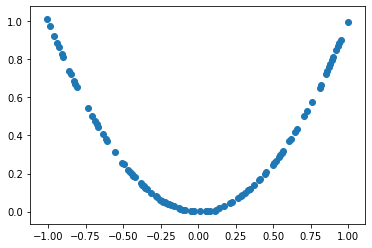

In [37]:
plt.scatter(x_test,preds)
plt.show()

# Test extrapolation properties of a NN

## Generate a MLP

In [53]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

tf.keras.backend.clear_session()
model = keras.Sequential()
model.add(keras.layers.Dense(50, activation="relu", input_shape=(1,)))
model.add(keras.layers.Dense(1, activation="linear"))
model.compile(optimizer='adam',               
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                100       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


## Prepare training data

x_train.shape= (140,)
y_train.shape= (140,)


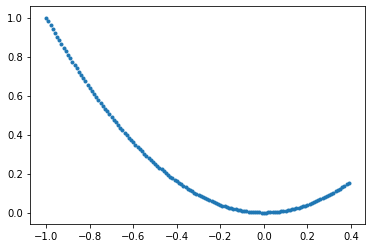

In [54]:
train_range_start = -1.0
train_range_end = 0.4

x_train = np.arange(train_range_start, train_range_end, 0.01)
y_train = x_train**2
print("x_train.shape=", x_train.shape)
print("y_train.shape=", y_train.shape)
plt.scatter(x_train,y_train, marker=".")
plt.show()

## Train the MLP

In [55]:
model.fit(x_train, y_train, epochs=150)

Train on 140 samples
Epoch 1/150
140/140 [==============================] - 0s 2ms/sample - loss: 0.1678 - accuracy: 0.0000e+00
Epoch 2/150
140/140 [==============================] - 0s 379us/sample - loss: 0.1421 - accuracy: 0.0000e+00
Epoch 3/150
140/140 [==============================] - 0s 318us/sample - loss: 0.1223 - accuracy: 0.0000e+00
Epoch 4/150
140/140 [==============================] - 0s 89us/sample - loss: 0.1049 - accuracy: 0.0000e+00
Epoch 5/150
140/140 [==============================] - 0s 328us/sample - loss: 0.0901 - accuracy: 0.0000e+00
Epoch 6/150
140/140 [==============================] - 0s 150us/sample - loss: 0.0778 - accuracy: 0.0000e+00
Epoch 7/150
140/140 [==============================] - 0s 90us/sample - loss: 0.0674 - accuracy: 0.0000e+00
Epoch 8/150
140/140 [==============================] - 0s 204us/sample - loss: 0.0589 - accuracy: 0.0000e+00
Epoch 9/150
140/140 [==============================] - 0s 72us/sample - loss: 0.0510 - accuracy: 0.0000e+00
Epo

## Prepare test data with extrapolation range

x_test.shape= (400,)
y_test.shape= (400,)


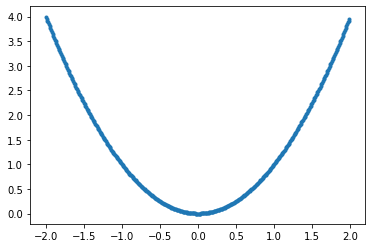

In [56]:
# Here we can define on which x values to test the model
# THIS CAN BE DIFFERENT FROM THE TRAIN RANGE! (i.e. extrapoloation range)

test_range_start = -2.0
test_range_end   = +2.0

x_test = np.arange(test_range_start, test_range_end, 0.01)
y_test = x_test**2
print("x_test.shape=", x_test.shape)
print("y_test.shape=", y_test.shape)
plt.scatter(x_test,y_test, marker=".")
plt.show()

## Test the model with test data

In [57]:
preds = model.predict(x_test)

In [58]:
preds.shape

(400, 1)

In [59]:
preds[:10]

array([[1.7670639],
       [1.7589679],
       [1.7508721],
       [1.7427763],
       [1.7346804],
       [1.7265847],
       [1.7184888],
       [1.7103928],
       [1.702297 ],
       [1.6942014]], dtype=float32)

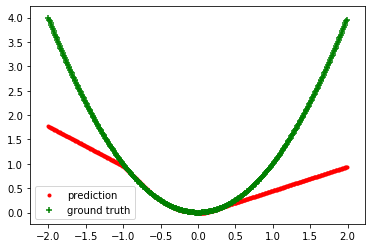

In [60]:
plt.scatter(x_test, preds,  marker=".", color="red",   label="prediction")
plt.scatter(x_test, y_test, marker="+", color="green", label="ground truth")
plt.legend()
plt.show()

## Two polynomial models

In [61]:
x_test.shape

(400,)

In [65]:
y1 = 1.4*x_test**2

In [66]:
y1.shape

(400,)

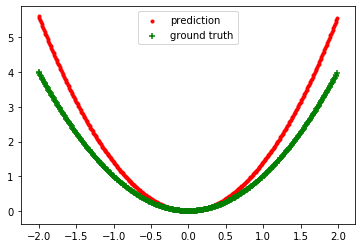

In [67]:
plt.scatter(x_test, y1,     marker=".", color="red",   label="prediction")
plt.scatter(x_test, y_test, marker="+", color="green", label="ground truth")
plt.legend()
plt.show()

In [70]:
#    a0  + a1*x       + a2*x^2         + a3*x^3
y2 = 0.5 + 0.1*x_test + 0.1*x_test**2 + 0.9*x_test**3

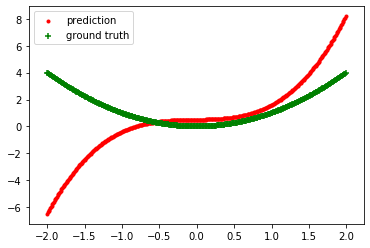

In [72]:
plt.scatter(x_test, y2,     marker=".", color="red",   label="prediction")
plt.scatter(x_test, y_test, marker="+", color="green", label="ground truth")
plt.legend()
plt.show()

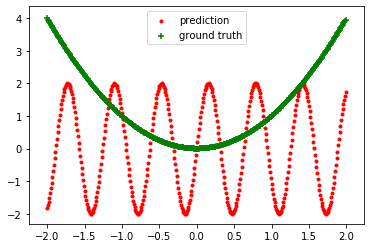

In [81]:
# And here a complete different model:
# perhaps we know, that the data comes from a harmonic function
# why not use a harmonic function as a model?

a0 = 2.0
a1 = 10.0

y3 = a0 * np.sin(x_test*a1)

plt.scatter(x_test, y3, marker=".",     color="red",   label="prediction")
plt.scatter(x_test, y_test, marker="+", color="green", label="ground truth")
plt.legend()
plt.show()